# Exploratory Data Analysis of Point Cloud Features


# Point properties


In [3]:
filepath ='Vaihingen3DTraining.las'
print(filepath)

Vaihingen3DTraining.las


In [4]:
import laspy
import numpy as np
file = laspy.read(filepath)

## Classification


In [4]:
classes = file.classification

In [5]:
class_names = ['Powerline', 'Low vegetation', 'Impervious surfaces', 'Car',
'Fence/Hedge', 'Roof', 'Facade', 'Shrub', 'Tree']

In [6]:
u,c = np.unique(classes, return_counts =True)
print(c.shape)

(9,)


In [7]:
import pandas as pd
df = pd.DataFrame(c, columns = ['labels'], index = class_names)
df

,labels
Powerline,546
Low vegetation,180850
Impervious surfaces,193723
Car,4614
Fence/Hedge,12070
Roof,152045
Facade,27250
Shrub,47605
Tree,135173


Text(0, 0.5, 'Count')

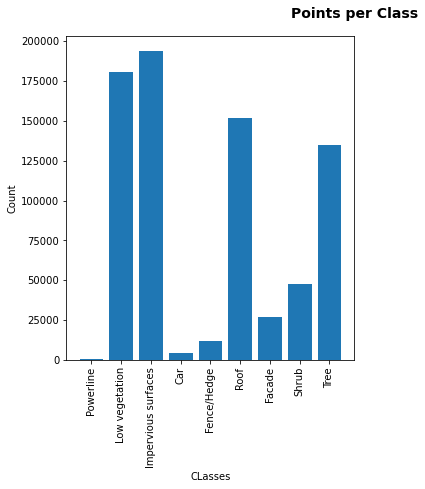

In [8]:
%matplotlib inline 
import matplotlib.pyplot as plt 
fig = plt.figure(figsize=(8,5))
fig.suptitle('Points per Class', fontsize =14, fontweight = 'semibold')
ax = fig.add_axes((0,0,.5,.9))
ax.bar(u,c, tick_label =class_names)
for tick in ax.get_xticklabels():
    tick.set_rotation('vertical')
ax.set_xlabel('CLasses')
ax.set_ylabel('Count')

Text(0, 0.5, 'Count')

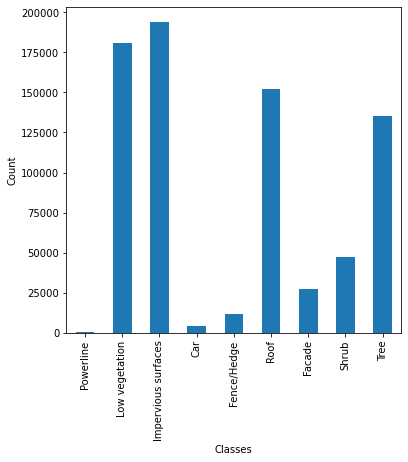

In [9]:
ax = df.plot.bar(figsize=(6,6), legend=False)
ax.set_xlabel('Classes')
ax.set_ylabel('Count')

In [10]:
print('Intensity:', file.intensity.dtype)
print('Number of returns:', file.num_returns.dtype)
print('Return number:', file.return_num.dtype)

Intensity: uint16
Number of returns: uint8
Return number: uint8


In [11]:
print('Intensity:', np.unique(file.intensity))
print('Number of returns:',np.unique(file.num_returns))
print('Return number:',np.unique(file.return_num))

Intensity: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243

## Intensity

Text(0, 0.5, 'COunt')

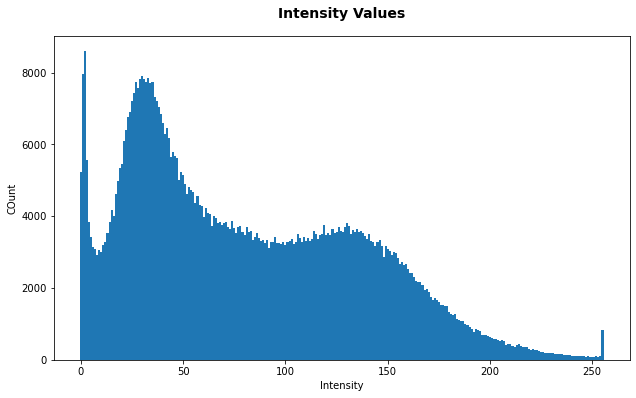

In [12]:
u,c = np.unique(file.intensity,return_counts=True)

fig =plt.figure(figsize=(8,5))
fig.suptitle('Intensity Values', fontsize=14,fontweight = 'semibold')

ax = fig.add_axes((0,0,1,0.90))
ax.bar(u,c, width =1.0)
ax.set_xlabel('Intensity')
ax.set_ylabel('COunt')

Text(0, 0.5, 'Counts')

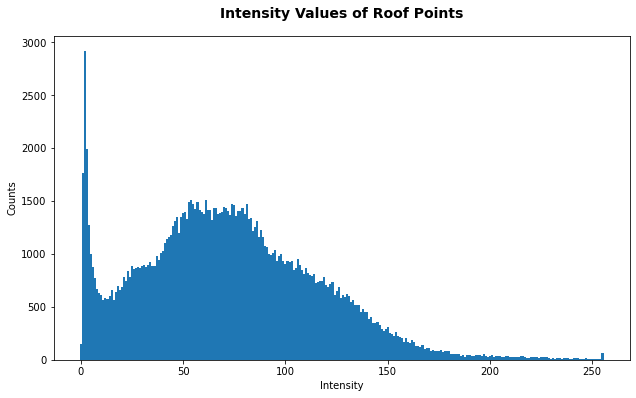

In [13]:
roof_intensities = np.take(file.intensity,np.where(classes ==5))
u,c =np.unique(roof_intensities ,return_counts=True)
fig = plt.figure(figsize=(8,5))
fig.suptitle('Intensity Values of Roof Points', fontsize = 14, fontweight = 'semibold')
ax = fig.add_axes((0,0,1,0.9))
ax.bar(u,c, width =1.0)
ax.set_xlabel('Intensity')
ax.set_ylabel('Counts')

Text(0, 0.5, 'Counts')

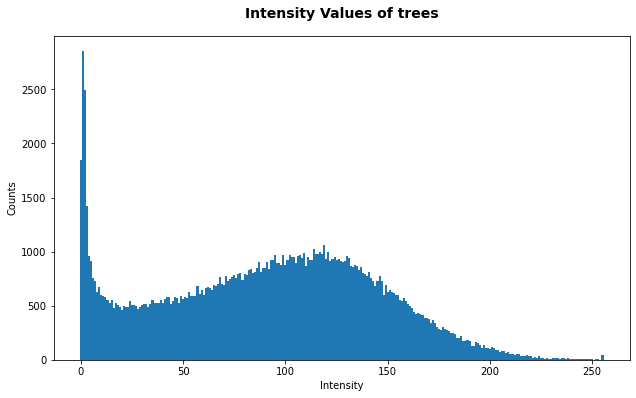

In [14]:
tree_intensities = np.take(file.intensity,np.where(classes ==8))
u,c =np.unique(tree_intensities ,return_counts=True)
fig = plt.figure(figsize=(8,5))
fig.suptitle('Intensity Values of trees', fontsize = 14, fontweight = 'semibold')
ax = fig.add_axes((0,0,1,0.9))
ax.bar(u,c, width =1.0)
ax.set_xlabel('Intensity')
ax.set_ylabel('Counts')

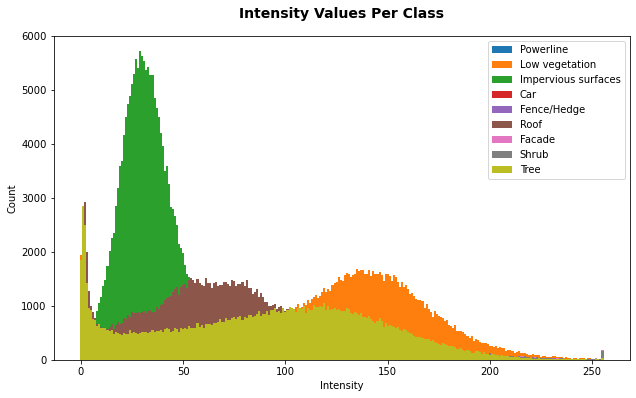

In [15]:
fig = plt.figure(figsize=(8,5))
fig.suptitle('Intensity Values Per Class', fontsize=14, fontweight='semibold')

ax = fig.add_axes((0,0,1,0.9))
ax.set_xlabel('Intensity')
ax.set_ylabel('Count')

for i,n in enumerate(class_names):
    # u,c =np.unique(np.take(file.intensity,np.where(classes ==i),return_counts=True))
    u, c = np.unique(np.take(file.intensity, np.where(classes == i)),return_counts=True)
    ax.bar(u,c, width =1.0,label=n)
ax.legend(loc='best')

In [16]:
print(u.shape)

(256,)


In [17]:
1%3

1

(256,)


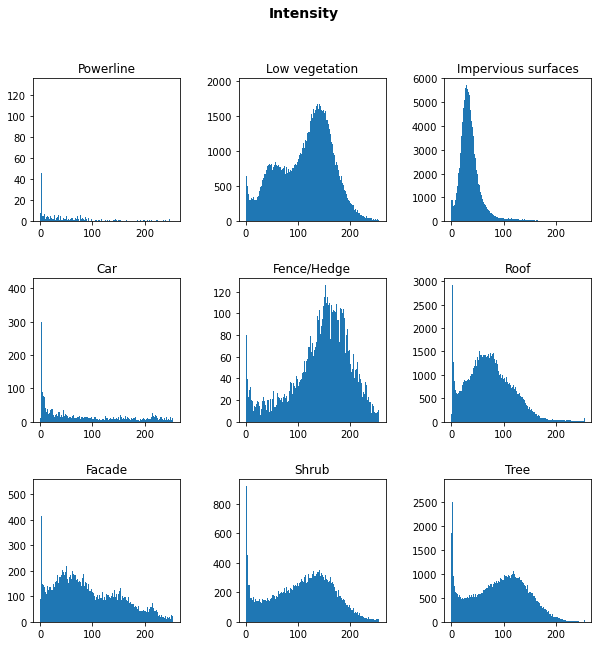

In [18]:
fig, ax =plt.subplots(3,3, sharex='none', sharey='none', figsize=(10,10))
fig.subplots_adjust(hspace=0.4,wspace=0.4)
fig.suptitle('Intensity', fontsize = 14,fontweight = 'semibold')

for i,n in enumerate(class_names):
    u,c = np.unique(np.take(file.intensity,np.where(classes ==i)),return_counts=True)
    ax[i//3,i%3].bar(u,c, width=1.0)
    ax[i//3,i%3].set(title=class_names[i])
print(u.shape)    

## Number of returns


In [19]:
u,c = np.unique(file.num_returns,return_counts=True)


(4,)


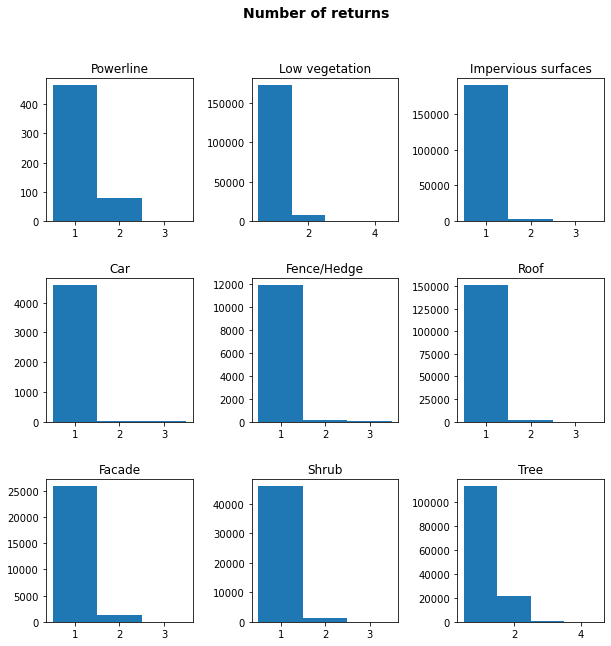

In [20]:
fig, ax =plt.subplots(3,3, sharex='none', sharey='none', figsize=(10,10))
fig.subplots_adjust(hspace=0.4,wspace=0.4)
fig.suptitle('Number of returns', fontsize = 14,fontweight = 'semibold')

for i,n in enumerate(class_names):
    u,c = np.unique(np.take(file.num_returns,np.where(classes ==i)),return_counts=True)
    ax[i//3,i%3].bar(u,c, width=1.0)
    ax[i//3,i%3].set(title=class_names[i])
print(u.shape)    

## Return number


In [21]:
u, c = np.unique(file.return_num, return_counts=True)
print(u, c)

[1 2 3 4] [735339  18147    389      1]


(4,)


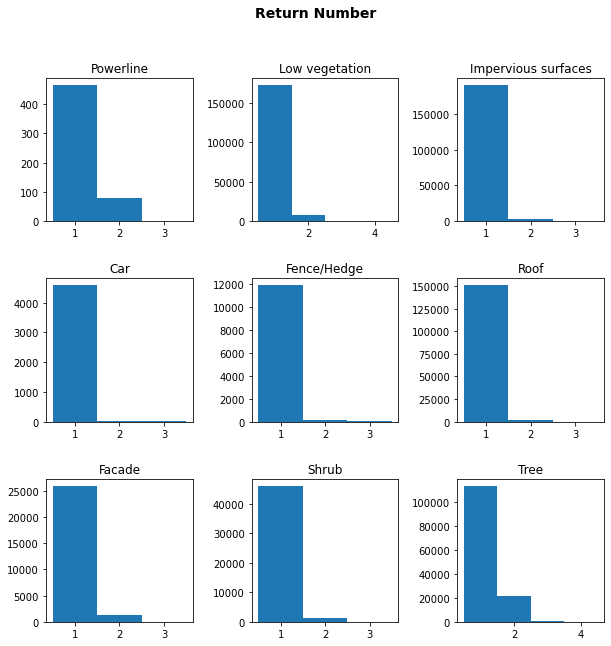

In [22]:
fig, ax =plt.subplots(3,3, sharex='none', sharey='none', figsize=(10,10))
fig.subplots_adjust(hspace=0.4,wspace=0.4)
fig.suptitle('Return Number', fontsize = 14,fontweight = 'semibold')

for i,n in enumerate(class_names):
    u,c = np.unique(np.take(file.num_returns,np.where(classes ==i)),return_counts=True)
    ax[i//3,i%3].bar(u,c, width=1.0)
    ax[i//3,i%3].set(title=class_names[i])
print(u.shape)    

# Features

In [23]:
data_dir = str(Path.home()) + r'/coursematerial/GIS/ISPRS/PointsWithFeatures'
filepath = os.path.join(data_dir, r'FeaturesReference.npy')
features = np.load(filepath)
#features = np.load('Features.npy')
print(features.shape)

(753876, 23)


In [24]:
feature_names = ['linearity', 
                 'planarity', 
                 'scattering', 
                 'omnivariance', 
                 'anisotropy', 
                 'eigenentropy', 
                 'sum_eigenvalues', 
                 'change_of_curvature', 
                 'radius_knn3d', 
                 'density_3d', 
                 'verticality', 
                 'absolute_height', 
                 'delta_z_knn3d', 
                 'std_z',
                 'sum_of_eigenvalues_2d',
                 'ratio_of_eigenvalues_2d',
                 'radius_knn_2d',
                 'density_2d',
                 'eigenvalue1',
                 'eigenvalue2',
                 'eigenvalue3',
                 'eigenvalue2D1',
                 'eigenvalue2D2'
                ]

df = pd.DataFrame(features, columns=feature_names)
df

,linearity,planarity,scattering,omnivariance,anisotropy,eigenentropy,sum_eigenvalues,change_of_curvature,radius_knn3d,density_3d,...,std_z,sum_of_eigenvalues_2d,ratio_of_eigenvalues_2d,radius_knn_2d,density_2d,eigenvalue1,eigenvalue2,eigenvalue3,eigenvalue2D1,eigenvalue2D2
0,0.514636,0.484771,0.000593,0.044426,0.999407,0.635132,0.514617,0.000399,1.423552,1.655089,...,0.035433,0.513361,0.483495,1.423517,3.141629,0.672967,0.326634,0.000399,0.674084,0.325916
1,0.286950,0.712251,0.000799,0.048378,0.999201,0.682779,0.483546,0.000466,1.291007,2.218989,...,0.035964,0.482252,0.711442,1.290039,3.825380,0.583482,0.416052,0.000466,0.584302,0.415698
2,0.337194,0.662073,0.000733,0.047258,0.999267,0.675992,0.485428,0.000441,1.257975,2.398423,...,0.035526,0.484166,0.663891,1.257816,4.023891,0.601128,0.398431,0.000441,0.601001,0.398999
3,0.670130,0.327899,0.001971,0.065043,0.998029,0.570471,0.566638,0.001480,1.278241,2.286142,...,0.057638,0.563316,0.331784,1.273499,3.925390,0.750840,0.247680,0.001480,0.750873,0.249127
4,0.591237,0.406962,0.001801,0.064009,0.998199,0.611306,0.947597,0.001277,1.804384,0.812746,...,0.070328,0.942651,0.410825,1.799694,1.965543,0.708937,0.289787,0.001277,0.708805,0.291195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
753871,0.738930,0.257483,0.003587,0.077360,0.996413,0.528006,0.093828,0.002836,0.511273,35.725886,...,0.022804,0.093308,0.260700,0.510392,24.438379,0.790728,0.206435,0.002836,0.793210,0.206790
753872,0.466459,0.532517,0.001024,0.053272,0.998976,0.651261,0.097857,0.000667,0.512640,35.440786,...,0.016182,0.097595,0.531483,0.511077,24.372886,0.651650,0.347682,0.000667,0.652962,0.347038
753873,0.730894,0.266702,0.002404,0.068023,0.997596,0.529421,0.097016,0.001891,0.487750,41.148094,...,0.018638,0.096668,0.268709,0.487647,26.771227,0.786466,0.211643,0.001891,0.788203,0.211797
753874,0.718838,0.277748,0.003415,0.076797,0.996585,0.543241,0.093028,0.002658,0.521632,33.639426,...,0.019628,0.092643,0.281240,0.520096,23.534927,0.778466,0.218875,0.002658,0.780494,0.219506


In [25]:
df['class'] = classes
df

,linearity,planarity,scattering,omnivariance,anisotropy,eigenentropy,sum_eigenvalues,change_of_curvature,radius_knn3d,density_3d,...,sum_of_eigenvalues_2d,ratio_of_eigenvalues_2d,radius_knn_2d,density_2d,eigenvalue1,eigenvalue2,eigenvalue3,eigenvalue2D1,eigenvalue2D2,class
0,0.514636,0.484771,0.000593,0.044426,0.999407,0.635132,0.514617,0.000399,1.423552,1.655089,...,0.513361,0.483495,1.423517,3.141629,0.672967,0.326634,0.000399,0.674084,0.325916,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 8, 8, ..."
1,0.286950,0.712251,0.000799,0.048378,0.999201,0.682779,0.483546,0.000466,1.291007,2.218989,...,0.482252,0.711442,1.290039,3.825380,0.583482,0.416052,0.000466,0.584302,0.415698,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 8, 8, ..."
2,0.337194,0.662073,0.000733,0.047258,0.999267,0.675992,0.485428,0.000441,1.257975,2.398423,...,0.484166,0.663891,1.257816,4.023891,0.601128,0.398431,0.000441,0.601001,0.398999,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 8, 8, ..."
3,0.670130,0.327899,0.001971,0.065043,0.998029,0.570471,0.566638,0.001480,1.278241,2.286142,...,0.563316,0.331784,1.273499,3.925390,0.750840,0.247680,0.001480,0.750873,0.249127,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 8, 8, ..."
4,0.591237,0.406962,0.001801,0.064009,0.998199,0.611306,0.947597,0.001277,1.804384,0.812746,...,0.942651,0.410825,1.799694,1.965543,0.708937,0.289787,0.001277,0.708805,0.291195,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 8, 8, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
753871,0.738930,0.257483,0.003587,0.077360,0.996413,0.528006,0.093828,0.002836,0.511273,35.725886,...,0.093308,0.260700,0.510392,24.438379,0.790728,0.206435,0.002836,0.793210,0.206790,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 8, 8, ..."
753872,0.466459,0.532517,0.001024,0.053272,0.998976,0.651261,0.097857,0.000667,0.512640,35.440786,...,0.097595,0.531483,0.511077,24.372886,0.651650,0.347682,0.000667,0.652962,0.347038,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 8, 8, ..."
753873,0.730894,0.266702,0.002404,0.068023,0.997596,0.529421,0.097016,0.001891,0.487750,41.148094,...,0.096668,0.268709,0.487647,26.771227,0.786466,0.211643,0.001891,0.788203,0.211797,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 8, 8, ..."
753874,0.718838,0.277748,0.003415,0.076797,0.996585,0.543241,0.093028,0.002658,0.521632,33.639426,...,0.092643,0.281240,0.520096,23.534927,0.778466,0.218875,0.002658,0.780494,0.219506,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 8, 8, ..."


In [26]:
df.describe()

,linearity,planarity,scattering,omnivariance,anisotropy,eigenentropy,sum_eigenvalues,change_of_curvature,radius_knn3d,density_3d,...,std_z,sum_of_eigenvalues_2d,ratio_of_eigenvalues_2d,radius_knn_2d,density_2d,eigenvalue1,eigenvalue2,eigenvalue3,eigenvalue2D1,eigenvalue2D2
count,753876.000000,753876.000000,753876.000000,753876.000000,753876.000000,753876.000000,753876.000000,753876.000000,753876.000000,753876.000000,...,753876.000000,753876.000000,753876.000000,753876.000000,753876.000000,753876.000000,753876.000000,753876.000000,753876.000000,753876.000000
mean,0.557764,0.387218,0.055018,0.124257,0.944982,0.637717,0.530745,0.032339,0.972458,118.045849,...,0.194098,0.434099,0.411878,0.935126,44.341698,0.694408,0.273253,0.032339,0.733804,0.266196
std,0.254856,0.251118,0.093513,0.088348,0.093513,0.216737,0.644467,0.049539,0.487351,1200.733030,...,0.242841,0.441575,0.262245,0.458810,467.636812,0.139602,0.127630,0.049539,0.139479,0.139479
min,0.000276,0.000062,0.000008,0.003198,0.130580,0.004297,0.000411,0.000007,0.030000,0.002944,...,0.003663,0.000048,0.000014,0.014142,0.067502,0.351351,0.000380,0.000007,0.500122,0.000014
25%,0.349201,0.169167,0.001215,0.051112,0.925870,0.537542,0.179740,0.000844,0.671118,2.419261,...,0.025231,0.157143,0.177836,0.650000,4.369688,0.582220,0.178383,0.000844,0.613985,0.150985
50%,0.555117,0.363175,0.005859,0.079920,0.994141,0.673145,0.362666,0.004596,0.890730,6.756209,...,0.094673,0.335010,0.406867,0.870919,8.393141,0.664603,0.291794,0.004596,0.710799,0.289201
75%,0.774457,0.590015,0.074130,0.204756,0.998785,0.768934,0.676156,0.049049,1.254352,15.795880,...,0.284847,0.515722,0.628703,1.207021,15.067924,0.797438,0.378779,0.049049,0.849015,0.386015
max,0.999620,0.999046,0.869420,0.332718,0.999992,1.096792,34.571103,0.307947,11.749357,176838.830873,...,4.683002,27.902223,0.999513,9.711364,31830.989300,0.999530,0.499762,0.307947,0.999986,0.499878


## Height

As a first feature, we take a look at the elevation (absolute height, z-coordinate) stored with the points. We can again use the **describe()** method of pandas, which is now applied to a column of type Series.

In [27]:
df['absolute_height'].describe()

count    753876.000000
mean        268.098009
std           5.963596
min         250.600000
25%         264.300000
50%         267.830000
75%         271.840000
max         289.910000
Name: absolute_height, dtype: float64

In [28]:
df['absolute_height'].describe(percentiles=[0.01, 0.25, 0.5, 0.75, 0.99])

count    753876.000000
mean        268.098009
std           5.963596
min         250.600000
1%          254.240000
25%         264.300000
50%         267.830000
75%         271.840000
99%         282.250000
max         289.910000
Name: absolute_height, dtype: float64

Assuming that there might be outliers to both sides, let us define maybe more interesting percentiles with the **describe()** method. In the following example, we want to additionally output the 1 and 99 percentile to see how much differences the lowest and highest 1% of the points make.

We can either convert the pandas DataFrame into a NumPy array with the method **to_numpy()** to use with matplotlib.

Text(0, 0.5, 'height [m]')

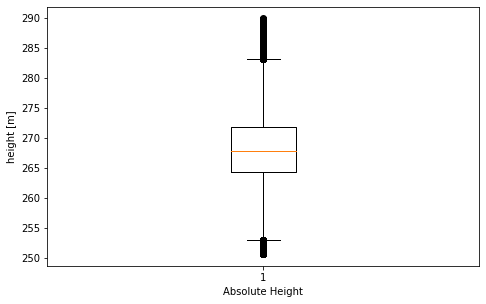

In [29]:
heights =df['absolute_height'].to_numpy()
fig=plt.figure()
ax = fig.add_axes([0,0,1,0.9])
ax.boxplot(heights)
ax.set_xlabel('Absolute Height')
ax.set_ylabel('height [m]')

Or use directly a column of the pandas DataFrame.

Text(0, 0.5, 'height [m]')

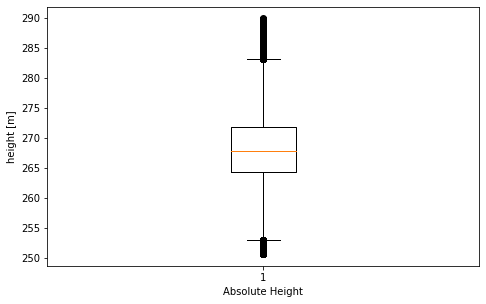

In [30]:
fig=plt.figure()
ax = fig.add_axes([0,0,1,0.9])
ax.boxplot(df['absolute_height'])
ax.set_xlabel('Absolute Height')
ax.set_ylabel('height [m]')

Pandas also offers convenient methods that can be directly called on a column of a DataFrame (which is an object of class Series).

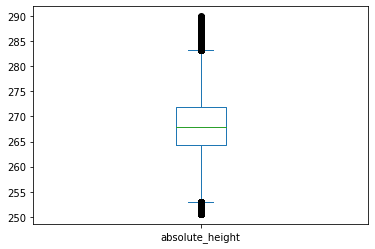

In [31]:
ax = df['absolute_height'].plot.box()

Next, we plot a combination of a box plot and a histogram of heights.

The bin widths are provided with the **bins** parameter as a NumPy array. Here, an array is constructed with the function **arange()** that contains values between start (first parameter), end (second parameter), and with a step size (third parameter) of 0.5. The start and end of the range is the floor of the minimum value and the ceiling of the maximum value in the elevation (height) column.

In [32]:
np.arange(np.floor(np.min(heights)),np.ceil(np.max(heights)),0.5)

array([250. , 250.5, 251. , 251.5, 252. , 252.5, 253. , 253.5, 254. ,
       254.5, 255. , 255.5, 256. , 256.5, 257. , 257.5, 258. , 258.5,
       259. , 259.5, 260. , 260.5, 261. , 261.5, 262. , 262.5, 263. ,
       263.5, 264. , 264.5, 265. , 265.5, 266. , 266.5, 267. , 267.5,
       268. , 268.5, 269. , 269.5, 270. , 270.5, 271. , 271.5, 272. ,
       272.5, 273. , 273.5, 274. , 274.5, 275. , 275.5, 276. , 276.5,
       277. , 277.5, 278. , 278.5, 279. , 279.5, 280. , 280.5, 281. ,
       281.5, 282. , 282.5, 283. , 283.5, 284. , 284.5, 285. , 285.5,
       286. , 286.5, 287. , 287.5, 288. , 288.5, 289. , 289.5])

These bins are then provided with the parameter **bins** of the **hist()** method to construct a histogram.

Text(0, 0.5, 'count')

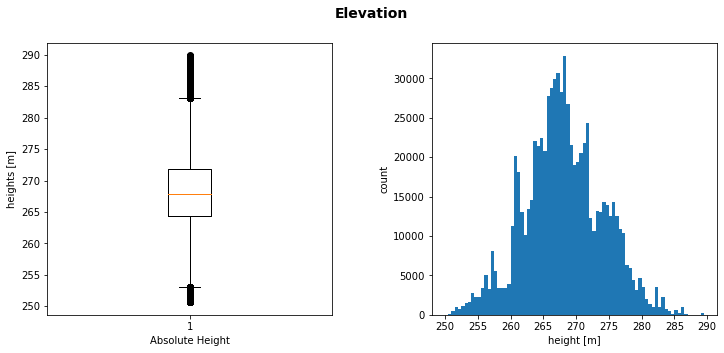

In [33]:
fig,ax = plt.subplots(1,2,figsize=(12,5))
fig.subplots_adjust(wspace=0.35)
fig.suptitle('Elevation', fontsize=14,fontweight ='semibold')

ax[0].boxplot(heights)
ax[0].set_xlabel('Absolute Height')
ax[0].set_ylabel('heights [m]')

ax[1].hist(heights,bins=np.arange(np.floor(np.min(heights)),np.ceil(np.max(heights)),0.5))
ax[1].set_xlabel('height [m]')
ax[1].set_ylabel('count')

And finally, a histogram of heights per classes as shown above for the intensity values.

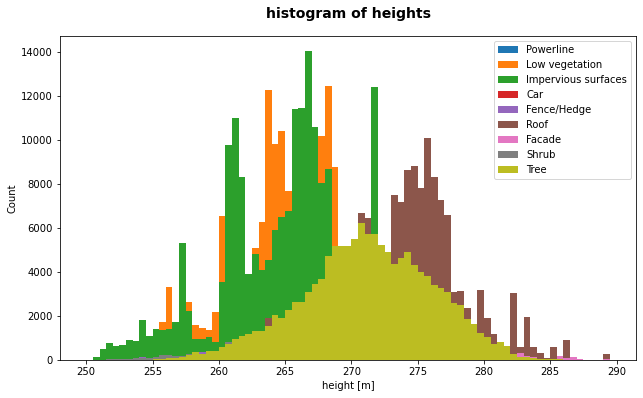

In [37]:
fig = plt.figure(figsize=(8,5))
fig.suptitle('histogram of heights', fontsize=14, fontweight='semibold')

ax = fig.add_axes((0,0,1,0.9))
ax.set_xlabel('height [m]')
ax.set_ylabel('Count')
bins = np.arange(np.floor(np.min(heights)),np.ceil(np.max(heights)),0.5)
for i,n in enumerate(class_names):
    ax.hist(heights[np.where(classes==i)],bins = bins)
ax.legend(labels=class_names)

Take a look at these heights and their classes and think if they make sense or not. It might also help to take a look at the point cloud in a 3D visualization, e.g., using CloudCompare.

## Planarity

Next, we turn to the feature of planarity. One could assume that impervious ground and roof surfaces have a high planarity and that vegetation has a rather low planarity.

We start with a simple boxplot of planarity values, and for simplicity use the pandas method **box()**.

In [ ]:
ax = df['planarity'].plot.box()

Pandas also has a quick way to get the percentiles or quantiles with the **percentile()** or **quantile()** method, respectively.

In [ ]:
df['planarity'].quantile([0.0, 0.25, 0.5, 0.75, 1.0])

We can now see where most of the values are located. The median is not quite at 0.5, but also not that far off. There are hardly any perfect planarity values.

Let us also plot a histogram of planarity values. Note that the pandas method returns an Axes object, which we can use to set some properties of the plot.

Text(0.5, 0, 'planarity')

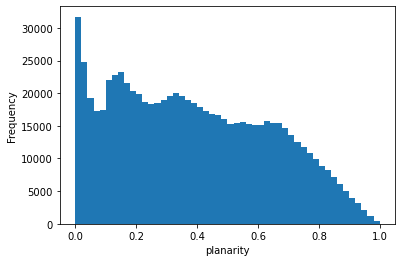

In [39]:
ax = df['planarity'].plot.hist(bins=50)
ax.set_xlabel('planarity')

Next, a histogram plot per class is generated, kind of like we did with the bar plots.

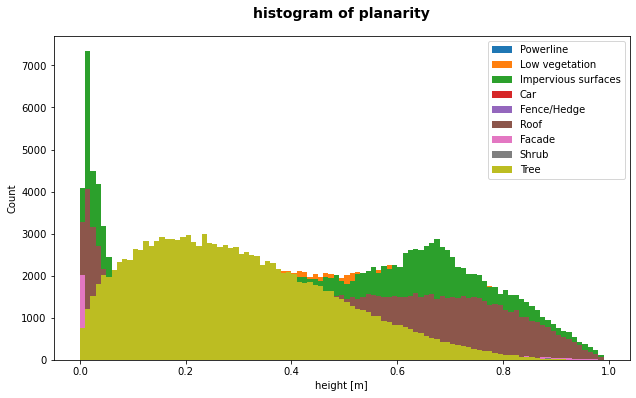

In [43]:
planarity = df['planarity'].to_numpy()
fig = plt.figure(figsize=(8,5))
fig.suptitle('histogram of planarity', fontsize=14, fontweight='semibold')

ax = fig.add_axes((0,0,1,0.9))
ax.set_xlabel('height [m]')
ax.set_ylabel('Count')
bins = np.arange(0.0,1.0,0.01)
for i,n in enumerate(class_names):
    ax.hist(planarity[np.where(classes==i)],bins = bins)
ax.legend(labels=class_names)

Unfortunately, the tree class occludes almost everything. But it can be seen that the tree class has mostly low planarity.

So let us better plot all the classes on their own.

(4,)


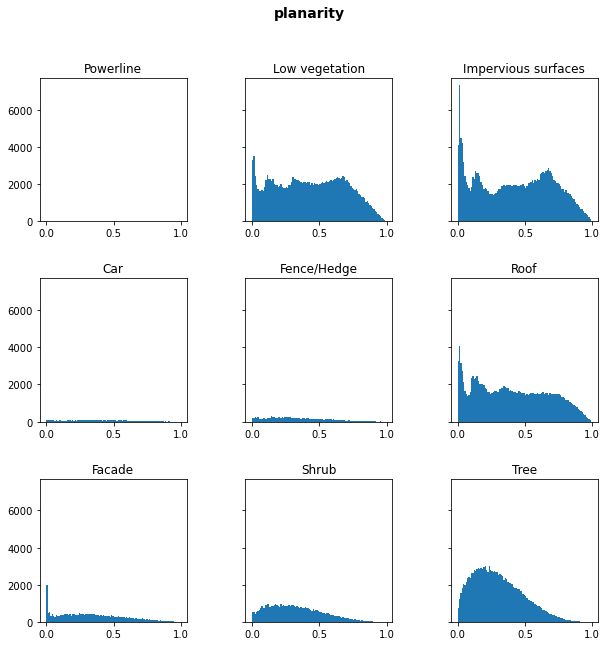

In [46]:
fig, ax =plt.subplots(3,3, sharex='none', sharey='all', figsize=(10,10))
fig.subplots_adjust(hspace=0.4,wspace=0.4)
fig.suptitle('planarity', fontsize = 14,fontweight = 'semibold')
bins = np.arange(0.0,1.0,0.01)
for i,n in enumerate(class_names):
    ax[i//3,i%3].hist(planarity[np.where(classes==i)],bins = bins)
    ax[i//3,i%3].set(title=class_names[i])
print(u.shape)    

As a conclusion, the tree, shrub, fence/hedge classes clearly have a tendency to lower planarity. And although impervious surfaces and roofs have more points with high planarity values, they are nevertheless rather homogeneously distributed. Perfectly planar points are very seldom, which might have to do with the low density of the point cloud itself, and the comparably large neighborhood of 20 points from which the feature is calculated. All 20 points would need to be located on a plane for a very high planarity value. 

The point cloud has a point density of approximately 4 points per square meter. And a group of 20 points therefore take over 4 square meters. There are not that many points with that many neighbor points that make flat areas.

By the way, to better see the histograms of classes like power line, car, and fence/hedge, you can set the **sharey** parameter to none in the above figure.

# Scattering

For the feature, scattering, we would expect a reversed image. So, let us start with the histograms per classes.

That is an unexpected outcome. It can be improved by turning off to option to share the y-scale.

To investigate this further, let us take a look at a box plot.

It seems that most points have a low scattering value. But at least from the second histogram plot, we can see that tree, shrub, and fence/hedge do actually have some noticeable scattering that is higher than 0.025. We can concentrate on the values with low scattering (<0.01) and have another plot.

Notice how the two conditions are combined with the **logical_and()** function of NumPy. Each condition ("classes == i" and "scattering < 0.1") gives an array of Boolean values, that have the value true where the condition is true. These two arrays of Boolean values are then combined to a single Boolean array, which can ten be used in where() to find the indices where both conditions hold.

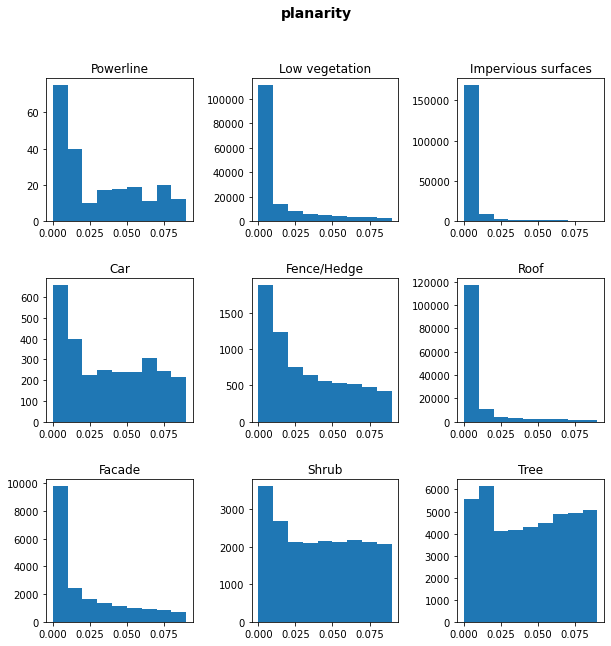

In [49]:
scattering = df['scattering'].to_numpy()
fig, ax =plt.subplots(3,3, sharex='none', sharey='none', figsize=(10,10))
fig.subplots_adjust(hspace=0.4,wspace=0.4)
fig.suptitle('planarity', fontsize = 14,fontweight = 'semibold')
bins = np.arange(0.0,0.1,0.01)
for i,n in enumerate(class_names):
    ax[i//3,i%3].hist(scattering[np.where(np.logical_and(classes==i,scattering <0.1))],bins = bins)
    ax[i//3,i%3].set(title=class_names[i])
  

From this we notice that impervious surfaces and roof have a very low scattering as expected, because they should mostly consists of flat surfaces. (Although a more pronounced value range would have been nicer.) Because only few beams of an aerial laser scanner hits building facades, these points are also rather scattered instead of planar. This is to be expected.

## Density 3D

As a last feature, we take a look at the 3d density of the k nearest neighbor points. We limit the range of bins to be between 0 and 30 as most values are in this range.

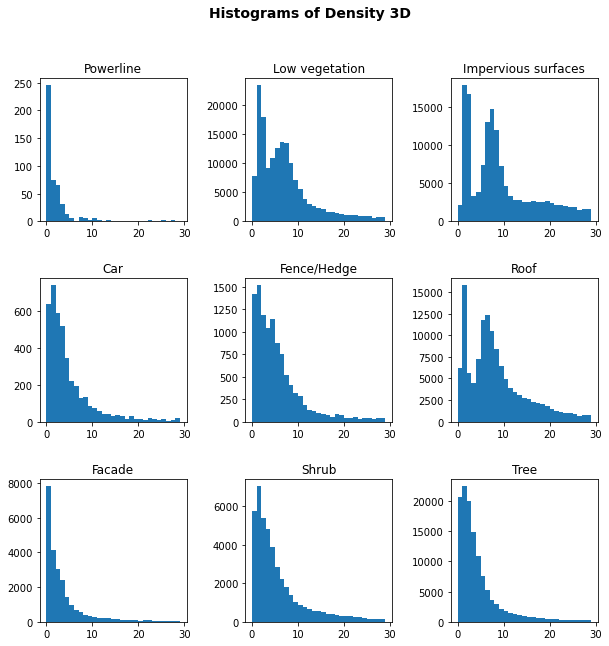

In [51]:
density3d = df['density_3d'].to_numpy()
fig, ax = plt.subplots(3, 3, sharex='none', sharey='none', figsize=(10, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
fig.suptitle('Histograms of Density 3D', fontsize=14, fontweight='bold')
for i,n in enumerate(class_names):
    ax[i//3, i%3].hist(density3d[np.where(classes == i)], bins=np.arange(0.0,30.0, 1.0))
    ax[i//3, i%3].set(title=class_names[i])

It is interesting to note that vegetation classes seem to have more values close to 0 and impervious surfaces and roof have higher values.

# Scatterplots

Before we come to an end, let us also do a few scatterplots in the end. A scatterplot is constructed with the **scatter()** method of an Axes object and takes two NumPy arrays as input. The **s** parameter gives the marker size. As there are many points, a very small marker size is used.

Text(0, 0.5, 'Scattering')

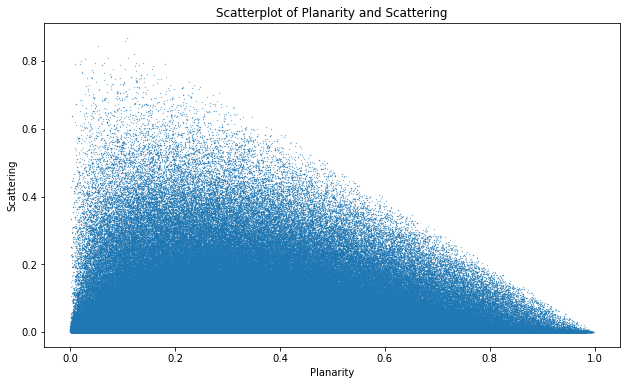

In [54]:
planarity = df['planarity'].to_numpy()
scattering = df['scattering'].to_numpy()
fig = plt.figure(figsize=(8,5))
ax= fig.add_axes((0,0,1,0.9))
ax.scatter(planarity,scattering, s=0.05)
ax.set_title('Scatterplot of Planarity and Scattering')
ax.set_xlabel('Planarity')
ax.set_ylabel('Scattering')

Because most scattering values are rather low, most points gather at the bottom of the plot.

Let us try the eigenvalues 1 and 3.

Pandas has a nice interface where we only need to provide the two column names of the features to plot.

<AxesSubplot:xlabel='eigenvalue1', ylabel='eigenvalue3'>

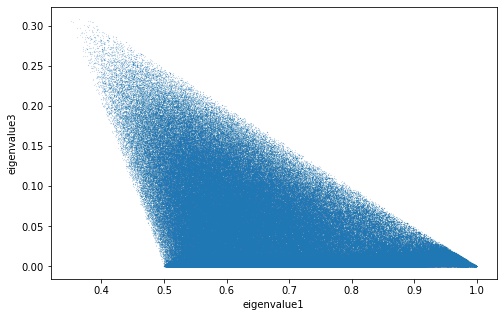

In [62]:
df.plot.scatter(x='eigenvalue1',y='eigenvalue3',figsize=(8,5),s=0.005)

As the eigenvalues are dependent on each other, we see some negative correlation, but there is also some differences. 

Even more prominent is the correlation of the 2D eigenvalues as they are even defined accordingly.

Since the **scatter()** method of pandas returns an Axes object, we can change the plot properties accordingly.

<AxesSubplot:xlabel='eigenvalue2D1', ylabel='eigenvalue2D2'>

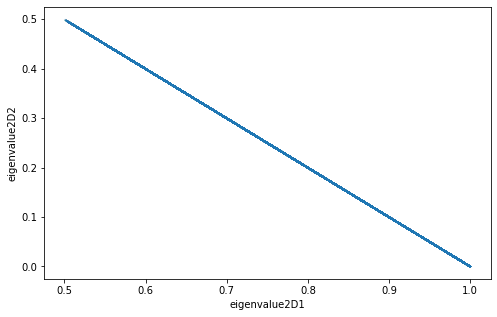

In [63]:
df.plot.scatter(x='eigenvalue2D1',y='eigenvalue2D2',figsize=(8,5),s=0.005)

Pandas provides also a **scatter_matrix()** function, although we need to provide a DataFrame as first argument.

array([[<AxesSubplot:xlabel='planarity', ylabel='planarity'>,
        <AxesSubplot:xlabel='scattering', ylabel='planarity'>,
        <AxesSubplot:xlabel='anisotropy', ylabel='planarity'>],
       [<AxesSubplot:xlabel='planarity', ylabel='scattering'>,
        <AxesSubplot:xlabel='scattering', ylabel='scattering'>,
        <AxesSubplot:xlabel='anisotropy', ylabel='scattering'>],
       [<AxesSubplot:xlabel='planarity', ylabel='anisotropy'>,
        <AxesSubplot:xlabel='scattering', ylabel='anisotropy'>,
        <AxesSubplot:xlabel='anisotropy', ylabel='anisotropy'>]],
      dtype=object)

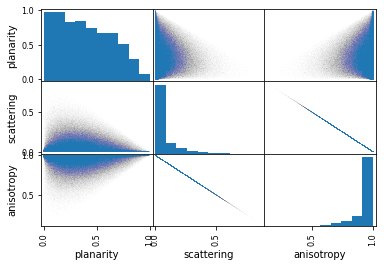

In [64]:
cutout = df[['planarity', 'scattering', 'anisotropy']]
pd.plotting.scatter_matrix(cutout,s=0.05)

Note that the diagonals are not scatterplots, as they would be scatterplots of the feature with themselves, but rather histograms of the respective features are shown. (As an alternative, kernel density estimations can also be displayed in the diagonal.)

# Final words

Feel free to explore further features on your own in the same or similar manner from what is shown above. 

You can also try a different k in the k nearest neighbor query when calculating the features and see if the features look different.

There are many more ways to customize plots in matplotlib. We leave it to you to further explore them.